In [1]:
import ktrain
from ktrain import text

## Loading data

In [2]:
trn, val, preproc = text.texts_from_folder("/home/jupyter-ozkan_ma/data/TXT/Full_Experiment/", 
                                           max_features=20000, maxlen=512, 
                                           ngram_range=1, 
                                           preprocess_mode='standard',
                                           classes=['Center', 'LeanLeft', 'LeanRight', 'Left', 'Right'])

detected encoding: utf-8
language: en
Word Counts: 166798
Nrows: 60000
60000 train sequences
train sequence lengths:
	mean : 256
	95percentile : 491
	99percentile : 523
x_train shape: (60000,512)
y_train shape: (60000, 5)
Is Multi-Label? False
15000 test sequences
test sequence lengths:
	mean : 261
	95percentile : 492
	99percentile : 524
x_test shape: (15000,512)
y_test shape: (15000, 5)


## Inspection of available classifiers

In [3]:
text.print_text_classifiers()

fasttext: a fastText-like model [http://arxiv.org/pdf/1607.01759.pdf]
logreg: logistic regression using a trainable Embedding layer
nbsvm: NBSVM model [http://www.aclweb.org/anthology/P12-2018]
bigru: Bidirectional GRU with pretrained fasttext word vectors [https://fasttext.cc/docs/en/crawl-vectors.html]
standard_gru: simple 2-layer GRU with randomly initialized embeddings
bert: Bidirectional Encoder Representations from Transformers (BERT) [https://arxiv.org/abs/1810.04805]
distilbert: distilled, smaller, and faster BERT from Hugging Face [https://arxiv.org/abs/1910.01108]


### Applying the fasttext model (mod_17):

In [4]:
fasttext = text.text_classifier("fasttext", trn, preproc=preproc)

Is Multi-Label? False
compiling word ID features...
maxlen is 512
done.


In [5]:
learner_ft = ktrain.get_learner(fasttext, train_data=trn, val_data=val)

simulating training for different learning rates... this may take a few moments...
Epoch 1/5
1875/1875 [==============================] - 24s 13ms/step - loss: 2.1702 - accuracy: 0.1963
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 2.0553 - accuracy: 0.2080
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 1.5531 - accuracy: 0.3383
Epoch 4/5
1875/1875 [==============================] - 24s 13ms/step - loss: 1.4940 - accuracy: 0.3191
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 1.8197 - accuracy: 0.1995


done.
Visually inspect loss plot and select learning rate associated with falling loss


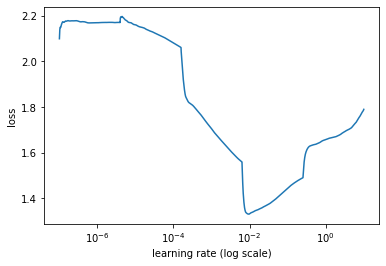

In [7]:
learner_ft.lr_find(show_plot=True, max_epochs=5)

In [8]:
learner_ft.lr_estimate()

(0.0059600915, 0.0009607558138668537)

In [9]:
learner_ft.fit(learner_ft.lr_estimate()[1], 5)

Epoch 1/5
1875/1875 [==============================] - 26s 14ms/step - loss: 1.4927 - accuracy: 0.3636 - val_loss: 1.1555 - val_accuracy: 0.5539
Epoch 2/5
1875/1875 [==============================] - 25s 13ms/step - loss: 1.2165 - accuracy: 0.5099 - val_loss: 1.0084 - val_accuracy: 0.6293
Epoch 3/5
1875/1875 [==============================] - 25s 14ms/step - loss: 1.1049 - accuracy: 0.5697 - val_loss: 0.9283 - val_accuracy: 0.6589
Epoch 4/5
1875/1875 [==============================] - 25s 13ms/step - loss: 1.0401 - accuracy: 0.5989 - val_loss: 0.8862 - val_accuracy: 0.6747
Epoch 5/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.9850 - accuracy: 0.6237 - val_loss: 0.8527 - val_accuracy: 0.6869


In [30]:
# Since val_loss still decreass train for 5 epochs
learner_ft.fit(learner_ft.lr_estimate()[1], 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9428 - accuracy: 0.6421 - val_loss: 0.8358 - val_accuracy: 0.6912
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9065 - accuracy: 0.6569 - val_loss: 0.8168 - val_accuracy: 0.6987
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8855 - accuracy: 0.6670 - val_loss: 0.8103 - val_accuracy: 0.7061
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8646 - accuracy: 0.6737 - val_loss: 0.7949 - val_accuracy: 0.7067
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8385 - accuracy: 0.6866 - val_loss: 0.7899 - val_accuracy: 0.7063


In [31]:
# Since val_loss still decreass train for 5 epochs
learner_ft.fit(learner_ft.lr_estimate()[1], 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8175 - accuracy: 0.6962 - val_loss: 0.7841 - val_accuracy: 0.7129
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8053 - accuracy: 0.7008 - val_loss: 0.7761 - val_accuracy: 0.7161
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7831 - accuracy: 0.7071 - val_loss: 0.7739 - val_accuracy: 0.7121
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7643 - accuracy: 0.7178 - val_loss: 0.7638 - val_accuracy: 0.7205
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7567 - accuracy: 0.7207 - val_loss: 0.7635 - val_accuracy: 0.7211


In [32]:
# Since val_loss still decreass train for 5 epochs
learner_ft.fit(learner_ft.lr_estimate()[1], 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7380 - accuracy: 0.7302 - val_loss: 0.7581 - val_accuracy: 0.7221
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7287 - accuracy: 0.7328 - val_loss: 0.7572 - val_accuracy: 0.7239
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7142 - accuracy: 0.7409 - val_loss: 0.7566 - val_accuracy: 0.7240
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6956 - accuracy: 0.7459 - val_loss: 0.7502 - val_accuracy: 0.7290
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6851 - accuracy: 0.7497 - val_loss: 0.7544 - val_accuracy: 0.7281


## Applying the logreg model: (mod_18)

In [10]:
logreg = text.text_classifier("logreg", trn, preproc=preproc)

Is Multi-Label? False
compiling word ID features...
maxlen is 512
done.


In [11]:
learner_log = ktrain.get_learner(logreg, train_data=trn, val_data=val)

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 1.7146 - accuracy: 0.2021
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 1.6671 - accuracy: 0.2077
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 1.5673 - accuracy: 0.2957
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 1.3564 - accuracy: 0.5022
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 1.0462 - accuracy: 0.6454
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.8784 - accuracy: 0.6938
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 2.2966 - accuracy: 0.6396
Epoch 8/10
1875/1875 [==============================] - 20s 11ms/step - loss: 5.3737 - accuracy: 0.6538


done.
Visually inspect loss plot and select learning rate associated with falling lo

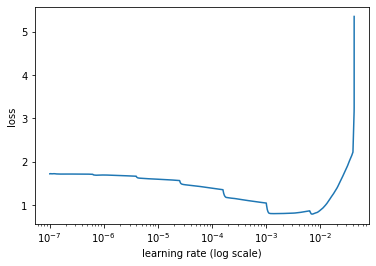

In [12]:
learner_log.lr_find(show_plot=True, max_epochs=10)

In [13]:
learner_log.lr_estimate()

(0.00096904906, 0.0007119994610548019)

In [14]:
learner_log.fit(learner_log.lr_estimate()[1], 10)

Epoch 1/10
1875/1875 [==============================] - 24s 13ms/step - loss: 1.0525 - accuracy: 0.6205 - val_loss: 0.8941 - val_accuracy: 0.6815
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.7328 - accuracy: 0.7530 - val_loss: 0.8356 - val_accuracy: 0.6986
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.6094 - accuracy: 0.7998 - val_loss: 0.8239 - val_accuracy: 0.7084
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.5294 - accuracy: 0.8286 - val_loss: 0.8299 - val_accuracy: 0.7099
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.4715 - accuracy: 0.8514 - val_loss: 0.8416 - val_accuracy: 0.7069
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4258 - accuracy: 0.8674 - val_loss: 0.8552 - val_accuracy: 0.7086
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3893 - accuracy: 0.8814 - val_loss: 0.8774 -

## Applying the nbsvm model: (mod_19)

In [15]:
nbsvm = text.text_classifier("nbsvm", trn, preproc=preproc)

Is Multi-Label? False
compiling word ID features...
maxlen is 512
building document-term matrix... this may take a few moments...
rows: 1-10000
rows: 10001-20000
rows: 20001-30000
rows: 30001-40000
rows: 40001-50000
rows: 50001-60000
computing log-count ratios...
done.


In [16]:
learner_nbsvm = ktrain.get_learner(nbsvm, train_data=trn, val_data=val)

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 1.6234 - accuracy: 0.2538
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 1.6055 - accuracy: 0.2797
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 1.5208 - accuracy: 0.3714
Epoch 4/10
1875/1875 [==============================] - 23s 13ms/step - loss: 1.3068 - accuracy: 0.5206
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 1.0285 - accuracy: 0.6416
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.8222 - accuracy: 0.6994
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 1.0721 - accuracy: 0.6738
Epoch 8/10
1875/1875 [==============================] - 22s 12ms/step - loss: 3.9741 - accuracy: 0.6312


done.
Visually inspect loss plot and select learning rate associated with falling lo

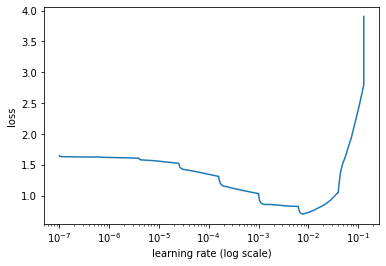

In [17]:
learner_nbsvm.lr_find(show_plot=True, max_epochs=10)

In [18]:
learner_nbsvm.lr_estimate()

(0.00096904906, 0.0007664425298571587)

In [19]:
learner_nbsvm.fit(learner_nbsvm.lr_estimate()[1], 10)

Epoch 1/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.9979 - accuracy: 0.6411 - val_loss: 0.9302 - val_accuracy: 0.6557
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.7968 - accuracy: 0.7145 - val_loss: 0.8925 - val_accuracy: 0.6660
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.7306 - accuracy: 0.7349 - val_loss: 0.8877 - val_accuracy: 0.6652
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.6914 - accuracy: 0.7468 - val_loss: 0.8892 - val_accuracy: 0.6669
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.6648 - accuracy: 0.7561 - val_loss: 0.8979 - val_accuracy: 0.6659
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6447 - accuracy: 0.7629 - val_loss: 0.9073 - val_accuracy: 0.6656
Epoch 7/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.6290 - accuracy: 0.7683 - val_loss: 0.9191 - 

## Applying the bigru model: (mod_20)

In [20]:
bigru = text.text_classifier("bigru", trn, preproc=preproc)

Is Multi-Label? False
compiling word ID features...
maxlen is 512
word vectors will be loaded from: https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.vec.gz
processing pretrained word vectors...
loading pretrained word vectors...this may take a few moments...


done.


In [21]:
learner_bigru = ktrain.get_learner(bigru, train_data=trn, val_data=val)

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
1875/1875 [==============================] - 122s 65ms/step - loss: 1.6235 - accuracy: 0.2044
Epoch 2/10
1875/1875 [==============================] - 120s 64ms/step - loss: 1.6156 - accuracy: 0.2065
Epoch 3/10
1875/1875 [==============================] - 122s 65ms/step - loss: 1.5928 - accuracy: 0.2785
Epoch 4/10
1875/1875 [==============================] - 122s 65ms/step - loss: 1.4374 - accuracy: 0.4360
Epoch 5/10
1875/1875 [==============================] - 122s 65ms/step - loss: 0.9646 - accuracy: 0.6376
Epoch 6/10
1875/1875 [==============================] - 121s 64ms/step - loss: 0.6935 - accuracy: 0.7461
Epoch 7/10
1875/1875 [==============================] - 122s 65ms/step - loss: nan - accuracy: 0.4852
Epoch 8/10
1875/1875 [==============================] - 122s 65ms/step - loss: nan - accuracy: 0.2000
Epoch 9/10
1875/1875 [==============================] - 104s 55ms/step - loss: nan 

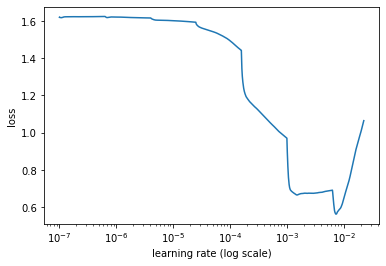

In [22]:
learner_bigru.lr_find(show_plot=True, max_epochs=10)

In [23]:
learner_bigru.lr_estimate()

(0.00015373503, 0.0022407829761505126)

In [24]:
learner_bigru.fit(learner_bigru.lr_estimate()[1], 7)

Epoch 1/7
1875/1875 [==============================] - 84s 45ms/step - loss: 0.8292 - accuracy: 0.6873 - val_loss: 0.6380 - val_accuracy: 0.7686
Epoch 2/7
1875/1875 [==============================] - 83s 44ms/step - loss: 0.4537 - accuracy: 0.8425 - val_loss: 0.5953 - val_accuracy: 0.7965
Epoch 3/7
1875/1875 [==============================] - 84s 45ms/step - loss: 0.2370 - accuracy: 0.9211 - val_loss: 0.6777 - val_accuracy: 0.7978
Epoch 4/7
1875/1875 [==============================] - 83s 44ms/step - loss: 0.1165 - accuracy: 0.9624 - val_loss: 0.9120 - val_accuracy: 0.7811
Epoch 5/7
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0783 - accuracy: 0.9755 - val_loss: 0.9230 - val_accuracy: 0.7902
Epoch 6/7
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0660 - accuracy: 0.9790 - val_loss: 1.0541 - val_accuracy: 0.7863
Epoch 7/7
1875/1875 [==============================] - 87s 47ms/step - loss: 0.0617 - accuracy: 0.9798 - val_loss: 1.1387 - val_ac

## Applying the standard gru: (mod_21)

In [25]:
stgru = text.text_classifier("standard_gru", trn, preproc=preproc)

Is Multi-Label? False
compiling word ID features...
maxlen is 512
done.


In [26]:
learner_stgru = ktrain.get_learner(stgru, train_data=trn, val_data=val)

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
1875/1875 [==============================] - 93s 50ms/step - loss: 1.6114 - accuracy: 0.1995
Epoch 2/10
1875/1875 [==============================] - 94s 50ms/step - loss: 1.6112 - accuracy: 0.2010
Epoch 3/10
1875/1875 [==============================] - 95s 50ms/step - loss: 1.6088 - accuracy: 0.2125
Epoch 4/10
1875/1875 [==============================] - 94s 50ms/step - loss: 1.5638 - accuracy: 0.2695
Epoch 5/10
1875/1875 [==============================] - 94s 50ms/step - loss: 1.3344 - accuracy: 0.4351
Epoch 6/10
1875/1875 [==============================] - 94s 50ms/step - loss: 1.2330 - accuracy: 0.5057
Epoch 7/10
1875/1875 [==============================] - 95s 51ms/step - loss: nan - accuracy: 0.2002
Epoch 8/10
1875/1875 [==============================] - 94s 50ms/step - loss: nan - accuracy: 0.2000
Epoch 9/10
1875/1875 [==============================] - 94s 50ms/step - loss: nan - accurac

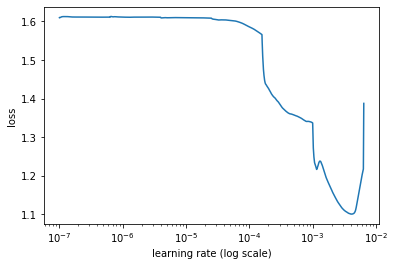

In [27]:
learner_stgru.lr_find(show_plot=True, max_epochs=10)

In [28]:
learner_stgru.lr_estimate()

(0.000970955, 0.0006403238512575626)

In [29]:
learner_stgru.fit(learner_stgru.lr_estimate()[1], 7)

Epoch 1/7
1875/1875 [==============================] - 102s 54ms/step - loss: 1.3736 - accuracy: 0.4017 - val_loss: 1.1747 - val_accuracy: 0.5362
Epoch 2/7
1875/1875 [==============================] - 102s 54ms/step - loss: 0.9958 - accuracy: 0.6101 - val_loss: 0.9259 - val_accuracy: 0.6566
Epoch 3/7
1875/1875 [==============================] - 101s 54ms/step - loss: 0.7716 - accuracy: 0.7146 - val_loss: 0.8067 - val_accuracy: 0.6997
Epoch 4/7
1875/1875 [==============================] - 101s 54ms/step - loss: 0.6663 - accuracy: 0.7580 - val_loss: 0.7334 - val_accuracy: 0.7307
Epoch 5/7
1875/1875 [==============================] - 101s 54ms/step - loss: 0.6032 - accuracy: 0.7815 - val_loss: 0.6983 - val_accuracy: 0.7487
Epoch 6/7
1875/1875 [==============================] - 102s 54ms/step - loss: 0.5552 - accuracy: 0.8000 - val_loss: 0.6654 - val_accuracy: 0.7624
Epoch 7/7
1875/1875 [==============================] - 101s 54ms/step - loss: 0.5174 - accuracy: 0.8145 - val_loss: 0.6982 -